In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!wget "https://github.com/akki8087/Big-Mart-Sales/raw/master/Train.csv"

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
print(data.shape)
data.describe().T

(8523, 12)


count         mean          std       min  \
Item_Weight                7060.0    12.857645     4.643456     4.555   
Item_Visibility            8523.0     0.066132     0.051598     0.000   
Item_MRP                   8523.0   140.992782    62.275067    31.290   
Outlet_Establishment_Year  8523.0  1997.831867     8.371760  1985.000   
Item_Outlet_Sales          8523.0  2181.288914  1706.499616    33.290   

                                   25%          50%          75%           max  
Item_Weight                   8.773750    12.600000    16.850000     21.350000  
Item_Visibility               0.026989     0.053931     0.094585      0.328391  
Item_MRP                     93.826500   143.012800   185.643700    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                      1999      Medium               Tier 1   
1                      2009      Medium               Tier 3   
2                      1999      Medium               Tier 1   
3                      1998      Medium               Tier 3   
4                      1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
data['Item_Weight'].interpolate(inplace=True)
data['Item_Weight'].isnull().sum()

0

In [7]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)
data['Outlet_Size'].isnull().sum()

0

In [8]:
print(f'Number of unique values in "Estd. Year" is {data.Outlet_Establishment_Year.nunique()}')
print(data.Outlet_Establishment_Year.value_counts(dropna=False))
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('object')

Number of unique values in "Estd. Year" is 9
1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


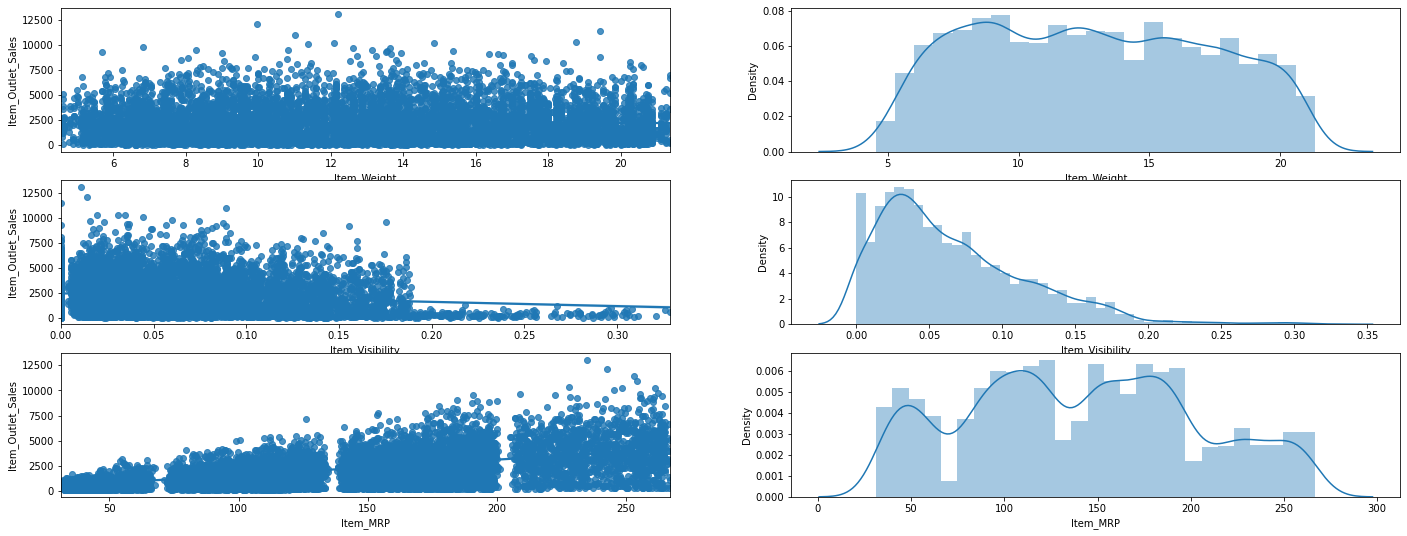

In [11]:
num_cols.remove('Item_Outlet_Sales')
count = 1
plt.figure(figsize = (24, 9))
for col in num_cols:
    plt.subplot(3, 2, count)
    sns.regplot(x = col, y = 'Item_Outlet_Sales', data = data)
    plt.xlabel(col)
    count += 1
    plt.subplot(3, 2, count)
    sns.distplot(data.loc[data[col].notnull(), col])
    count += 1

In [10]:
obj_cols = [ * data.select_dtypes('object').columns]

for col in obj_cols:
    if data[col].nunique() > 10:
        print(f'Number of unique values in {col} is {data[col].nunique()} so not printing values')
        print()
    else:
        print(f'Values in {col} are :\n{data[col].value_counts()}')
        print()

Number of unique values in Item_Identifier is 1559 so not printing values

Values in Item_Fat_Content are :
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Number of unique values in Item_Type is 16 so not printing values

Values in Outlet_Identifier are :
OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Values in Outlet_Establishment_Year are :
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Values in Outlet_Size are :
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Values in Outlet_Location_Type are :
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Values in Outlet_Type are :
Supermarket Type1    5577
Groc

In [12]:
data['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
data['Item_Fat_Content'].replace({'LF': "Low Fat", 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
data['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
print(data['Item_Identifier'].sample(10))
print(data['Item_Identifier'].str[:3].value_counts(dropna = False))
print(data['Item_Identifier'].str[:2].value_counts(dropna = False))

data['Item_Identifier'] = data['Item_Identifier'].str[:2]

7941    FDW09
6259    FDC46
4947    NCB55
1245    DRA12
5004    FDK24
2303    FDV59
5495    NCA53
7650    NCE30
2616    DRI01
5312    FDY02
Name: Item_Identifier, dtype: object
FDX    295
FDT    281
FDS    279
FDR    275
FDY    271
      ... 
DRO     14
DRP     12
DRZ     11
DRQ      7
DRY      6
Name: Item_Identifier, Length: 71, dtype: int64
FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64


In [15]:
data['Item_Fat_Content'] = np.where(data['Item_Identifier'] == 'NC', 'Non-edible', data['Item_Fat_Content'])

In [16]:
data.sample(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4892              FD       5.6750          Regular         0.023497   
7741              FD       6.6500          Low Fat         0.053280   
2173              FD      12.3500          Regular         0.033829   
1656              FD      13.6500          Regular         0.013036   
920               FD      11.4725          Regular         0.057870   
5524              FD      15.1750          Low Fat         0.136120   
812               FD       7.8650          Low Fat         0.061009   
6723              FD      12.8000          Low Fat         0.069606   
6301              DR       8.6700          Low Fat         0.065437   
468               FD       7.9750          Low Fat         0.014661   

                  Item_Type  Item_MRP Outlet_Identifier  \
4892            Snack Foods  156.1288            OUT046   
7741                 Canned  147.7734            OUT035   
2173                   Meat  196.9426            OUT045   
1656  Fruits and Vegetables  114.7834            OUT035   
920               Breakfast   49.7008            OUT019   
5524  Fruits and Vegetables   94.1094            OUT019   
812               Breakfast  166.0526            OUT013   
6723          Starchy Foods  261.9252            OUT035   
6301            Soft Drinks  142.9128            OUT046   
468            Baking Goods   85.1250            OUT045   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
4892                      1997       Small               Tier 1   
7741                      2004       Small               Tier 2   
2173                      2002      Medium               Tier 2   
1656                      2004       Small               Tier 2   
920                       1985       Small               Tier 1   
5524                      1985       Small               Tier 1   
812                       1987        High               Tier 3   
6723                      2004       Small               Tier 2   
6301                      1997       Small               Tier 1   
468                       2002      Medium               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
4892  Supermarket Type1          2828.3184  
7741  Supermarket Type1          2078.6276  
2173  Supermarket Type1          2768.3964  
1656  Supermarket Type1          3455.5020  
920       Grocery Store            50.6008  
5524      Grocery Store           190.4188  
812   Supermarket Type1          3617.9572  
6723  Supermarket Type1          4984.1788  
6301  Supermarket Type1          2013.3792  
468   Supermarket Type1          2663.2000

In [18]:
df = pd.get_dummies(data, drop_first = True)
df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0         9.30         0.016047  249.8092          3735.1380   
1         5.92         0.019278   48.2692           443.4228   
2        17.50         0.016760  141.6180          2097.2700   
3        19.20         0.000000  182.0950           732.3800   
4         8.93         0.000000   53.8614           994.7052   

   Item_Identifier_FD  Item_Identifier_NC  Item_Fat_Content_Non-edible  \
0                   1                   0                            0   
1                   0                   0                            0   
2                   1                   0                            0   
3                   1                   0                            0   
4                   0                   1                            1   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  ...  \
0                         0                 0                    0  ...   
1                         1                 0                    0  ...   
2                         0                 0                    0  ...   
3                         1                 0                    0  ...   
4                         0                 0                    0  ...   

   Outlet_Establishment_Year_2004  Outlet_Establishment_Year_2007  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Establishment_Year_2009  Outlet_Size_Medium  Outlet_Size_Small  \
0                               0                   1                  0   
1                               1                   1                  0   
2                               0                   1                  0   
3                               0                   1                  0   
4                               0                   0                  0   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  \
0                            0                            0   
1                            0                            1   
2                            0                            0   
3                            0                            1   
4                            0                            1   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                              1                              0   
1                              0                              1   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   Outlet_Type_Supermarket Type3  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  

[5 rows x 47 columns]

In [19]:
df.describe().T

count         mean          std     min  \
Item_Weight                      8523.0    12.831222     4.445074   4.555   
Item_Visibility                  8523.0     0.066132     0.051598   0.000   
Item_MRP                         8523.0   140.992782    62.275067  31.290   
Item_Outlet_Sales                8523.0  2181.288914  1706.499616  33.290   
Item_Identifier_FD               8523.0     0.718644     0.449687   0.000   
Item_Identifier_NC               8523.0     0.187610     0.390423   0.000   
Item_Fat_Content_Non-edible      8523.0     0.187610     0.390423   0.000   
Item_Fat_Content_Regular         8523.0     0.352693     0.477836   0.000   
Item_Type_Breads                 8523.0     0.029450     0.169073   0.000   
Item_Type_Breakfast              8523.0     0.012906     0.112877   0.000   
Item_Type_Canned                 8523.0     0.076147     0.265249   0.000   
Item_Type_Dairy                  8523.0     0.080019     0.271338   0.000   
Item_Type_Frozen Foods           8523.0     0.100434     0.300596   0.000   
Item_Type_Fruits and Vegetables  8523.0     0.144550     0.351667   0.000   
Item_Type_Hard Drinks            8523.0     0.025109     0.156464   0.000   
Item_Type_Health and Hygiene     8523.0     0.061011     0.239365   0.000   
Item_Type_Household              8523.0     0.106770     0.308839   0.000   
Item_Type_Meat                   8523.0     0.049865     0.217679   0.000   
Item_Type_Others                 8523.0     0.019829     0.139420   0.000   
Item_Type_Seafood                8523.0     0.007509     0.086334   0.000   
Item_Type_Snack Foods            8523.0     0.140795     0.347831   0.000   
Item_Type_Soft Drinks            8523.0     0.052212     0.222467   0.000   
Item_Type_Starchy Foods          8523.0     0.017365     0.130634   0.000   
Outlet_Identifier_OUT013         8523.0     0.109351     0.312098   0.000   
Outlet_Identifier_OUT017         8523.0     0.108647     0.311214   0.000   
Outlet_Identifier_OUT018         8523.0     0.108882     0.311509   0.000   
Outlet_Identifier_OUT019         8523.0     0.061950     0.241079   0.000   
Outlet_Identifier_OUT027         8523.0     0.109703     0.312538   0.000   
Outlet_Identifier_OUT035         8523.0     0.109117     0.311804   0.000   
Outlet_Identifier_OUT045         8523.0     0.108999     0.311656   0.000   
Outlet_Identifier_OUT046         8523.0     0.109117     0.311804   0.000   
Outlet_Identifier_OUT049         8523.0     0.109117     0.311804   0.000   
Outlet_Establishment_Year_1987   8523.0     0.109351     0.312098   0.000   
Outlet_Establishment_Year_1997   8523.0     0.109117     0.311804   0.000   
Outlet_Establishment_Year_1998   8523.0     0.065118     0.246748   0.000   
Outlet_Establishment_Year_1999   8523.0     0.109117     0.311804   0.000   
Outlet_Establishment_Year_2002   8523.0     0.108999     0.311656   0.000   
Outlet_Establishment_Year_2004   8523.0     0.109117     0.311804   0.000   
Outlet_Establishment_Year_2007   8523.0     0.108647     0.311214   0.000   
Outlet_Establishment_Year_2009   8523.0     0.108882     0.311509   0.000   
Outlet_Size_Medium               8523.0     0.610466     0.487673   0.000   
Outlet_Size_Small                8523.0     0.280183     0.449115   0.000   
Outlet_Location_Type_Tier 2      8523.0     0.326763     0.469057   0.000   
Outlet_Location_Type_Tier 3      8523.0     0.393054     0.488457   0.000   
Outlet_Type_Supermarket Type1    8523.0     0.654347     0.475609   0.000   
Outlet_Type_Supermarket Type2    8523.0     0.108882     0.311509   0.000   
Outlet_Type_Supermarket Type3    8523.0     0.109703     0.312538   0.000   

                                        25%          50%          75%  \
Item_Weight                        9.000000    12.600000    16.600000   
Item_Visibility                    0.026989     0.053931     0.094585   
Item_MRP                          93.826500   143.012800   185.643700   
Item_Outlet_Sales                834.247400  

In [20]:
df['Non-Visible'] = np.where(df['Item_Visibility'] == 0, 1, 0)
df['Non-Visible'].value_counts(dropna = False)

0    7997
1     526
Name: Non-Visible, dtype: int64

In [21]:
df.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0         9.30         0.016047  249.8092          3735.1380   
1         5.92         0.019278   48.2692           443.4228   
2        17.50         0.016760  141.6180          2097.2700   
3        19.20         0.000000  182.0950           732.3800   
4         8.93         0.000000   53.8614           994.7052   

   Item_Identifier_FD  Item_Identifier_NC  Item_Fat_Content_Non-edible  \
0                   1                   0                            0   
1                   0                   0                            0   
2                   1                   0                            0   
3                   1                   0                            0   
4                   0                   1                            1   

   Item_Fat_Content_Regular  Item_Type_Breads  Item_Type_Breakfast  ...  \
0                         0                 0                    0  ...   
1                         1                 0                    0  ...   
2                         0                 0                    0  ...   
3                         1                 0                    0  ...   
4                         0                 0                    0  ...   

   Outlet_Establishment_Year_2007  Outlet_Establishment_Year_2009  \
0                               0                               0   
1                               0                               1   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   Outlet_Size_Medium  Outlet_Size_Small  Outlet_Location_Type_Tier 2  \
0                   1                  0                            0   
1                   1                  0                            0   
2                   1                  0                            0   
3                   1                  0                            0   
4                   0                  0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Supermarket Type1  \
0                            0                              1   
1                            1                              0   
2                            0                              1   
3                            1                              0   
4                            1                              1   

   Outlet_Type_Supermarket Type2  Outlet_Type_Supermarket Type3  Non-Visible  
0                              0                              0            0  
1                              1                              0            0  
2                              0                              0            0  
3                              0                              0            1  
4                              0                              0            1  

[5 rows x 48 columns]

In [22]:
X, y = df.drop('Item_Outlet_Sales', axis = 1), df.Item_Outlet_Sales

In [23]:
X.shape, y.shape

((8523, 47), (8523,))

In [24]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

1113.939184607956


In [27]:
rf = RandomForestRegressor(max_depth = 5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

1072.1694961001008


In [28]:
gbm = GradientBoostingRegressor(max_depth = 2)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, gbm_pred)))

1064.0813624375799


In [34]:
model_list = [LinearRegression(), 
              RandomForestRegressor(max_depth = 5), 
              GradientBoostingRegressor(max_depth = 2),]
for model in model_list:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(np.sqrt(mean_squared_error(y_test, pred)))

1113.939184607956
1072.7682352024935
1064.0813624375799
